# Image and Video Analysis
## Crowdcounting

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

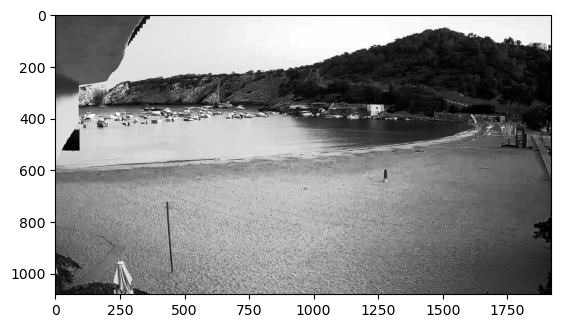

In [79]:
images = os.listdir("data")

object_array = np.empty(len(images), dtype='O')
it = 0
for i in images:
    image = cv2.imread("data/{}".format(i), cv2.IMREAD_GRAYSCALE)
    object_array[it] = cv2.equalizeHist(image)
    it += 1


empty_beach = object_array[3]
img2 = object_array[5]




plt.imshow(empty_beach, cmap = "gray")

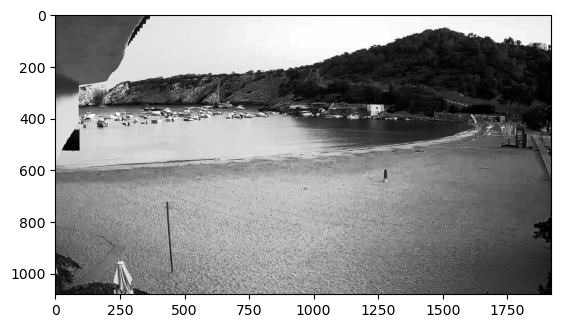

In [24]:
equalized_beach = cv2.equalizeHist(empty_beach)
equalized_img2 = cv2.equalizeHist(img2)


plt.imshow(equalized_beach, cmap = "gray")

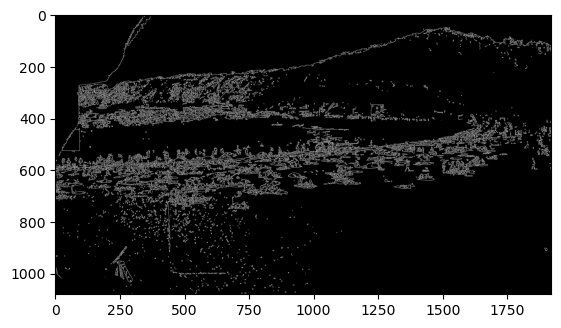

In [42]:
subs_image = cv2.subtract(equalized_beach, equalized_img2)

edges = cv2.Canny(image=subs_image, threshold1=100, threshold2=200)

plt.imshow(edges, cmap = "gray")

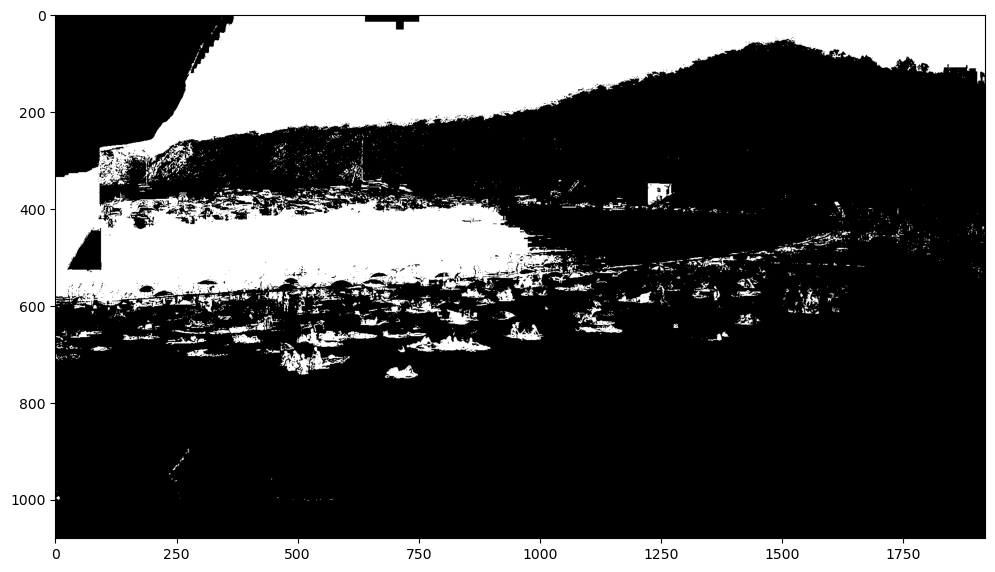

In [47]:
_, binary_image = cv2.threshold(subs_image, 100, 200, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(12, 10))
plt.imshow(binary_image, cmap = "gray")

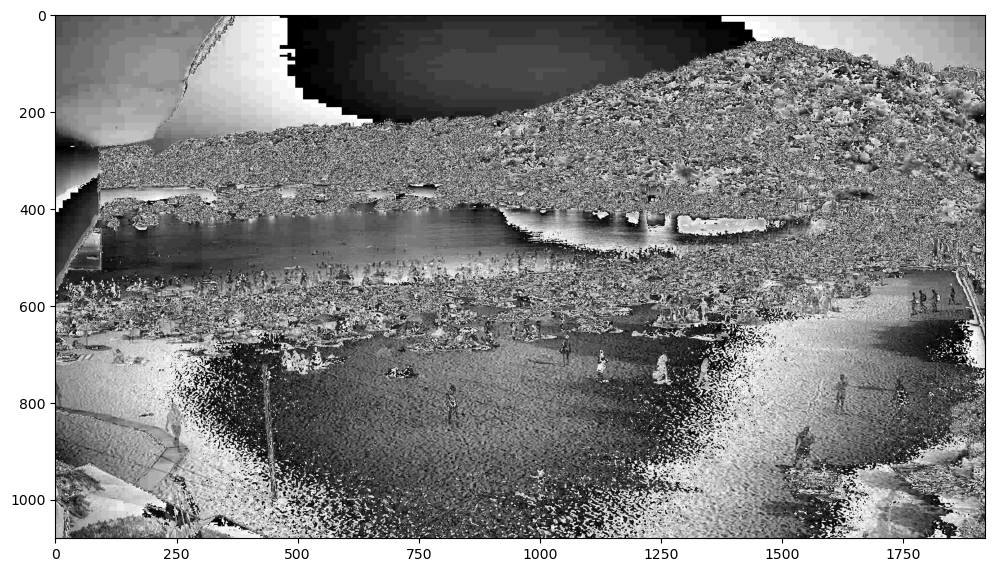

In [57]:
mean_img = np.mean(object_array,axis=0)

fig = plt.figure(figsize=(12, 10))
plt.imshow(mean_img, cmap = "gray")

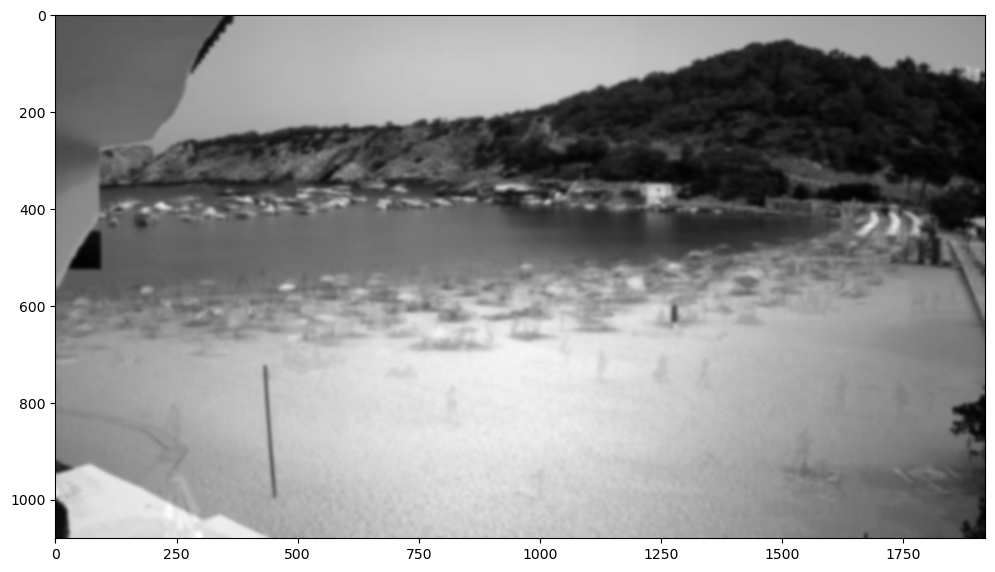

In [80]:
smoothed_imgs = np.empty(len(images), dtype='O')

it = 0
for img in object_array:
    smoothed_imgs[it] = cv2.GaussianBlur(img, (21,21), 0)
    it += 1


total = np.zeros(object_array[0].shape)

for img in smoothed_imgs:
    total = total + img

total = total / 10
fig = plt.figure(figsize=(12, 10))
plt.imshow(total, cmap = "gray")

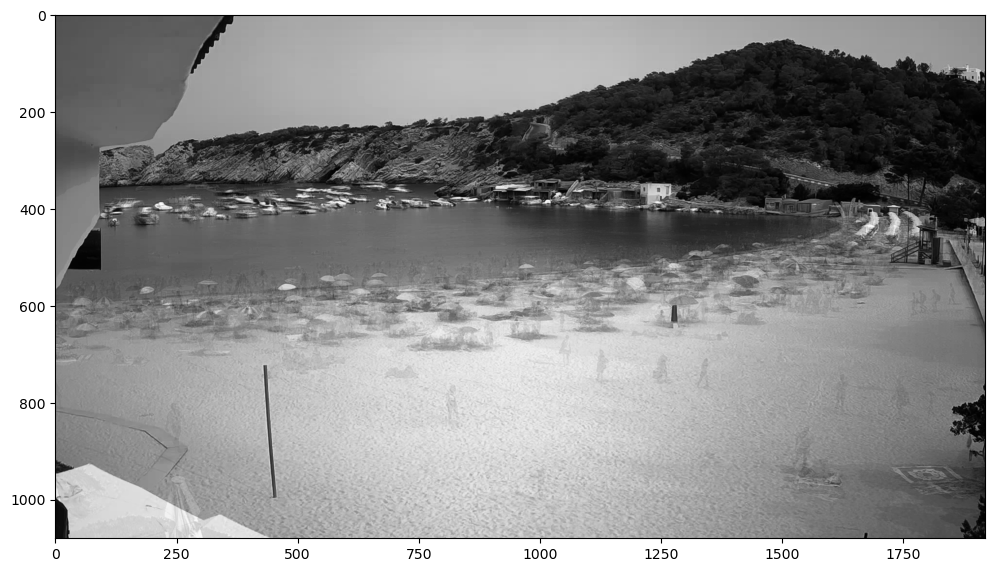

In [81]:
total = np.zeros(object_array[0].shape)

for img in object_array:
    total = total + img

total = total / 10
fig = plt.figure(figsize=(12, 10))
plt.imshow(total, cmap = "gray")

In [169]:
def min_max_norm(image):
    min_val = np.min(image)
    max_val = np.max(image)

    norm_image = (image - min_val) / (max_val - min_val)
    return norm_image

(10, 1080, 1920)


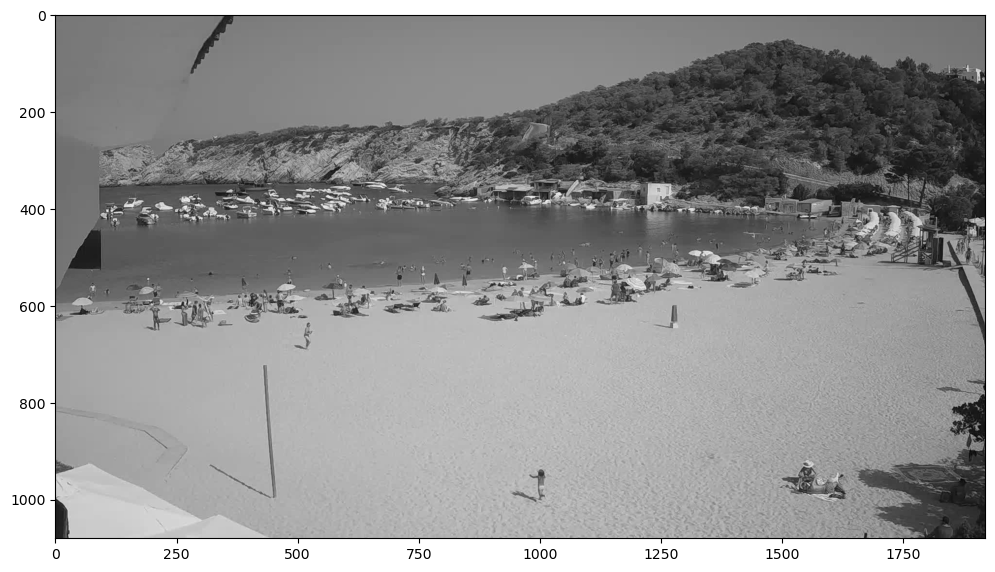

In [143]:
image_filenames = os.listdir("data")
for i in range(len(image_filenames)):
    image_filenames[i] = "data/" + image_filenames[i]

image_stack = np.stack([cv2.imread(filename, cv2.IMREAD_GRAYSCALE) for filename in image_filenames], axis=2)

image_stack = np.transpose(image_stack, (2, 0, 1))

print(image_stack.shape)
fig = plt.figure(figsize=(12, 10))
plt.imshow(image_stack[0], cmap = "gray")

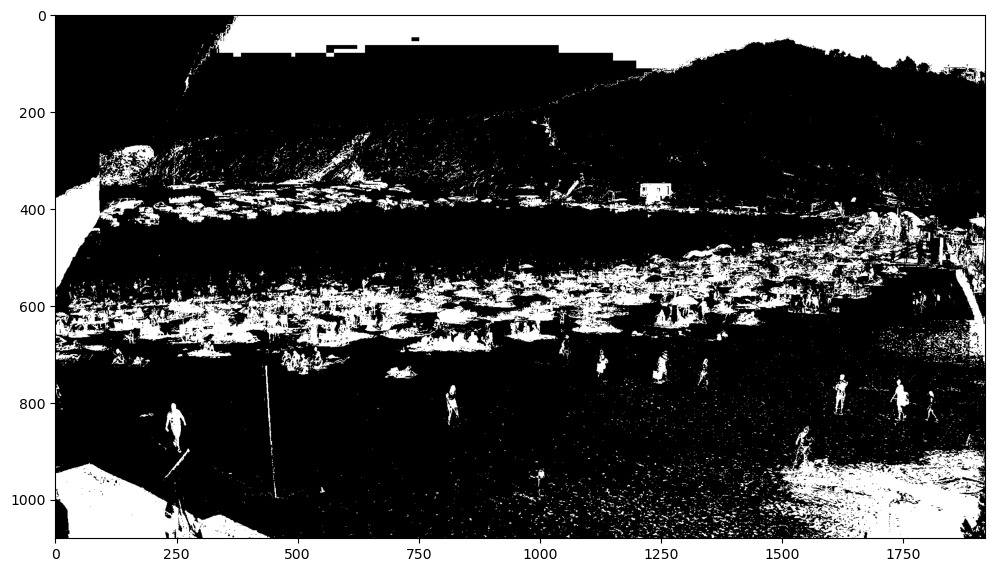

In [148]:
pixel_std_dev = np.std(image_stack, axis=0)

_, binary_image = cv2.threshold(pixel_std_dev, 30, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(12, 10))
plt.imshow(binary_image, cmap = "gray")

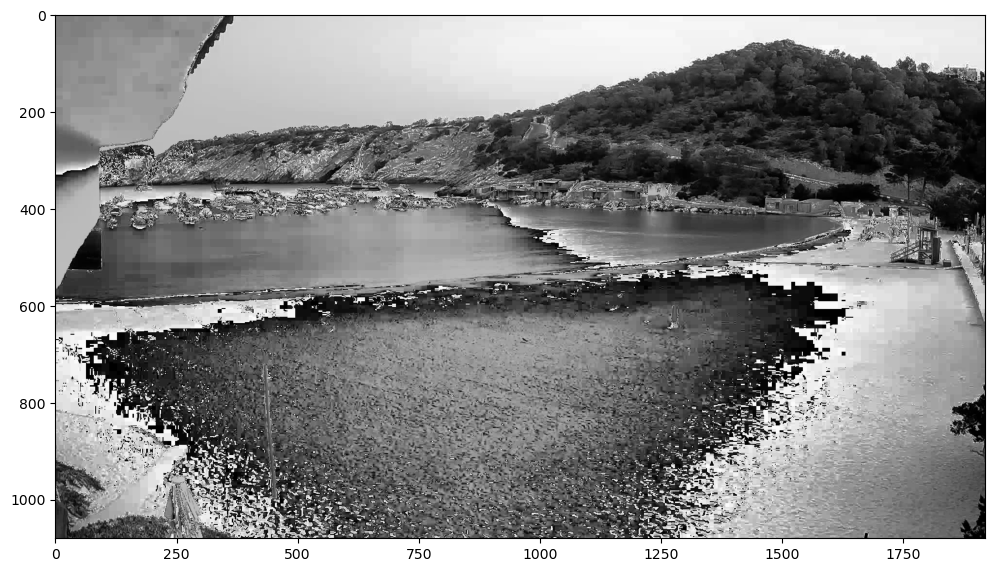

In [158]:
eq_beach_1 = cv2.equalizeHist(image_stack[9])
eq_beach_2 = cv2.equalizeHist(image_stack[3])


empty_beach_avg = (eq_beach_1 + eq_beach_2) / 2

fig = plt.figure(figsize=(12, 10))
plt.imshow(empty_beach_avg, cmap = "gray")

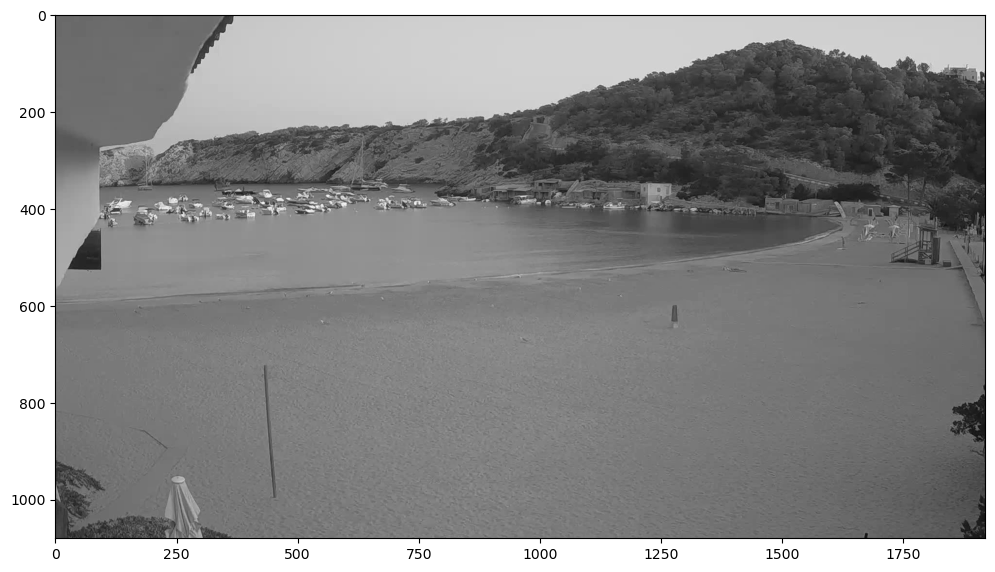

In [170]:
normalized_image_3 = min_max_norm(image_stack[3])
normalized_image_9 = min_max_norm(image_stack[9])


fig = plt.figure(figsize=(12, 10))
plt.imshow(normalized_image_3, cmap = "gray")

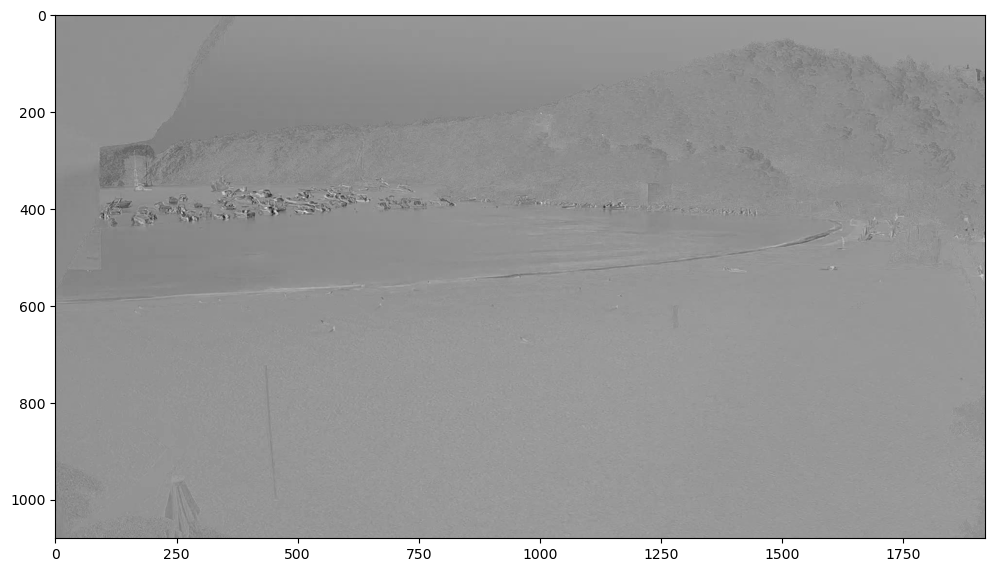

In [171]:
fig = plt.figure(figsize=(12, 10))
plt.imshow(normalized_image_9 - normalized_image_3, cmap = "gray")

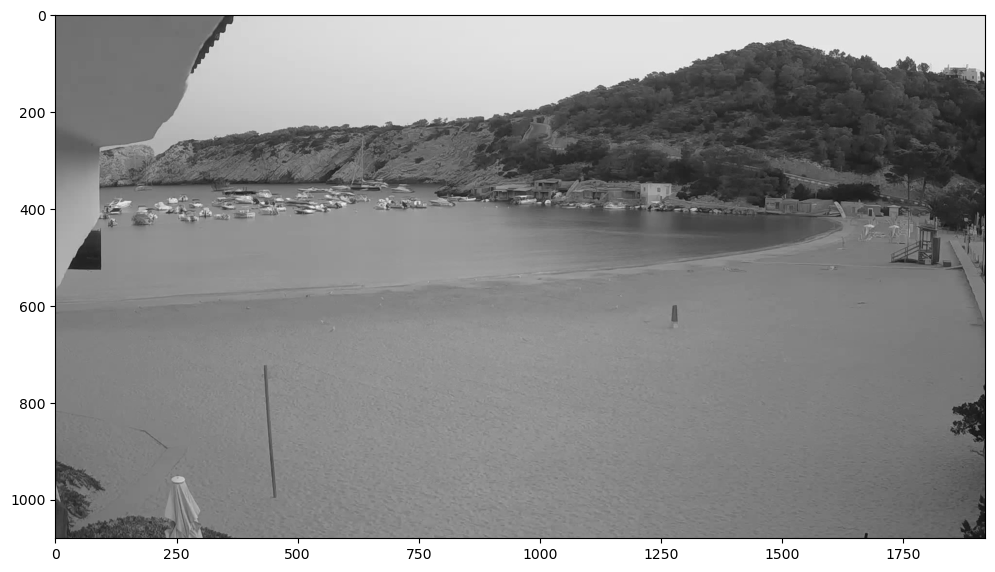

In [180]:
normalized_empty_beach = (normalized_image_3 + normalized_image_9) / 2

fig = plt.figure(figsize=(12, 10))
plt.imshow(normalized_empty_beach, cmap = "gray")

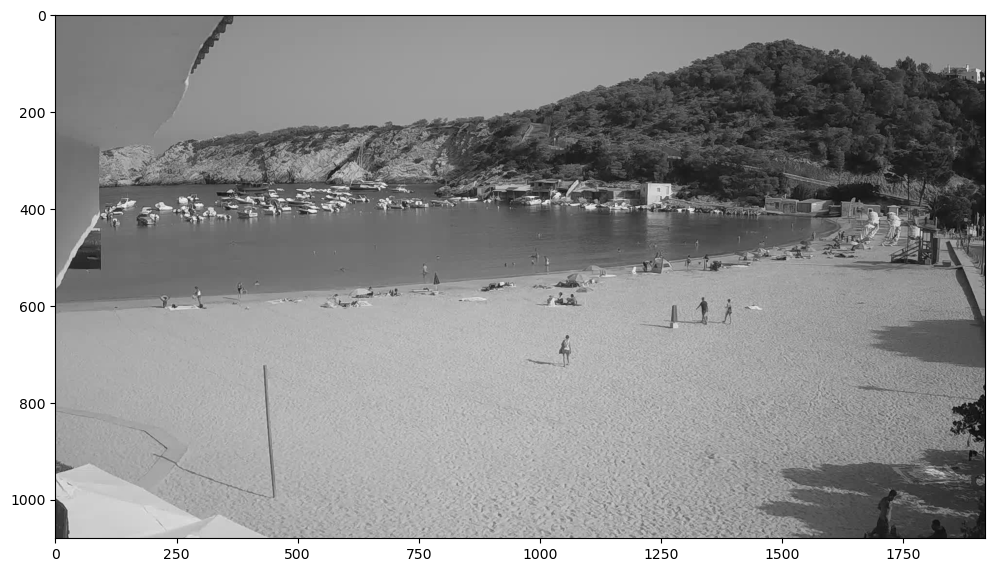

In [178]:
test_image = min_max_norm(image_stack[1])

fig = plt.figure(figsize=(12, 10))
plt.imshow(test_image, cmap = "gray")

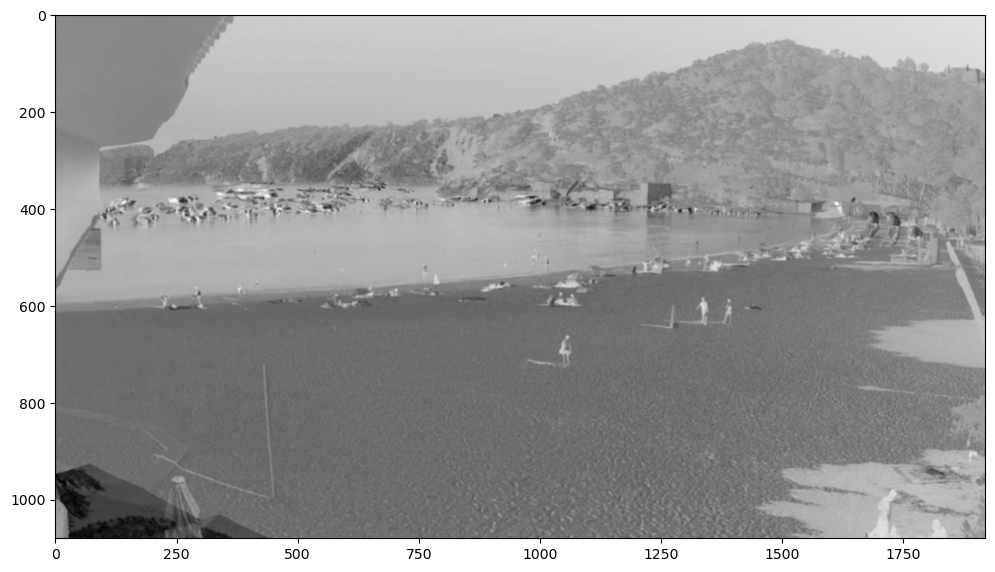

In [186]:

kernel = (7,7)
norm_empty_beach_avg_smo = cv2.GaussianBlur(normalized_empty_beach, kernel, 0)
test_image_smo = cv2.GaussianBlur(test_image, kernel, 0)

subs_image = cv2.subtract(norm_empty_beach_avg_smo, test_image_smo)

fig = plt.figure(figsize=(12, 10))
plt.imshow(subs_image, cmap = "gray")

# CLAHE TEST

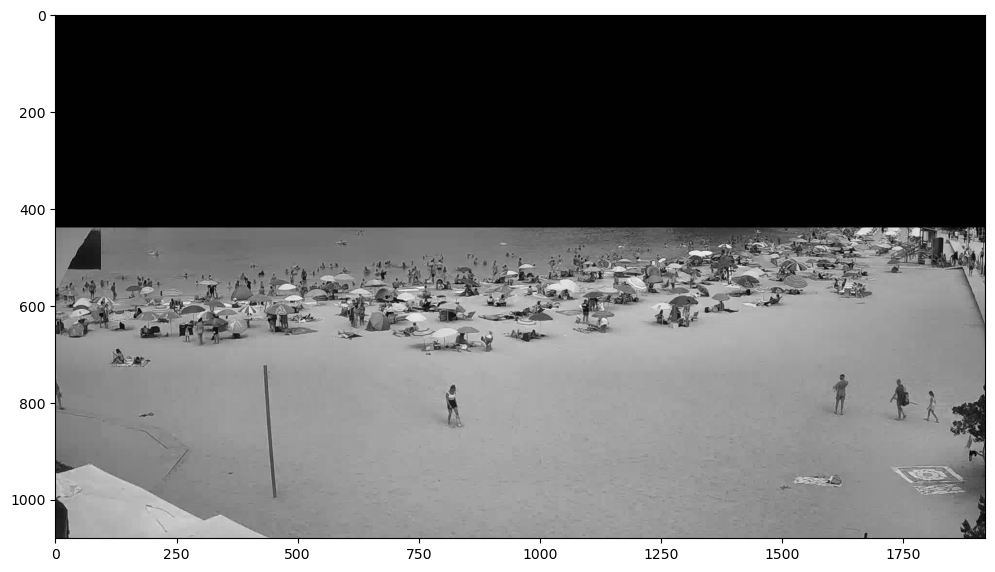

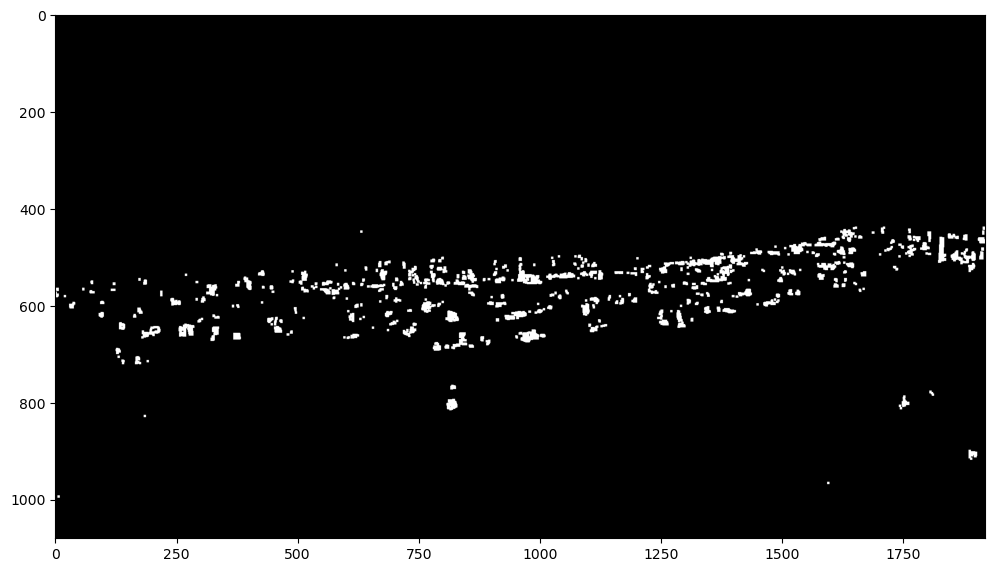

In [441]:
clahe = cv2.createCLAHE(clipLimit=1)

image_mod_3 = image_stack[3].copy()
image_mod_3[0:440,:] = 0

image_mod_9 = image_stack[9].copy()
image_mod_9[0:440,:] = 0

image_mod_4 = image_stack[4].copy()
image_mod_4[0:440,:] = 0

empty_beach_3 = clahe.apply(image_mod_3)

empty_beach_9 = clahe.apply(image_mod_9)

test_image_1 = clahe.apply(image_mod_4)

subs_image = cv2.subtract(empty_beach_9, test_image_1)

_, binary_image = cv2.threshold(subs_image, 100, 255, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), np.uint8)

dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

fig = plt.figure(figsize=(12, 10))
plt.imshow(test_image_1, cmap = "gray")
fig = plt.figure(figsize=(12, 10))
plt.imshow(dilated_image, cmap = "gray")


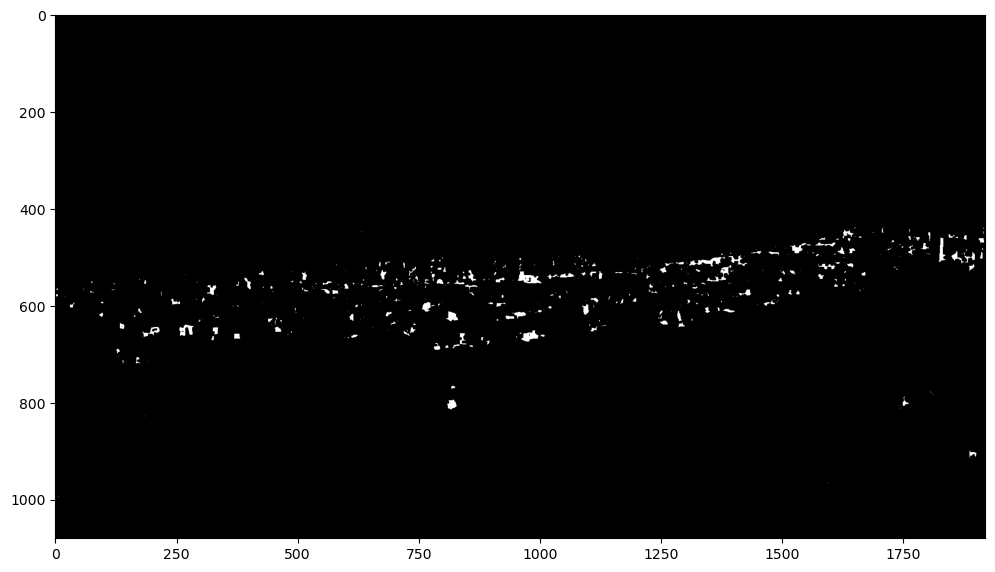

In [442]:
contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_image = dilated_image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 0, 255), 2)  # -1 means to draw all contours

fig = plt.figure(figsize=(12, 10))
plt.imshow(contour_image, cmap = "gray")

In [443]:
cont = np.squeeze(contours[0])
def aspect_ratio_cont(cont):
    cont = np.squeeze(cont)
    max_w = np.max(cont[:,0])
    max_h = np.max(cont[:,1])
    
    min_w = np.min(cont[:,0])
    min_h = np.min(cont[:,1])
    
    return (max_w - min_w) / (max_h - min_h)

aspect_ratio_cont_vec = np.vectorize(aspect_ratio_cont, otypes=[float])

aspect_ratio_calc = aspect_ratio_cont_vec(contours)




Cont en el rango:  16


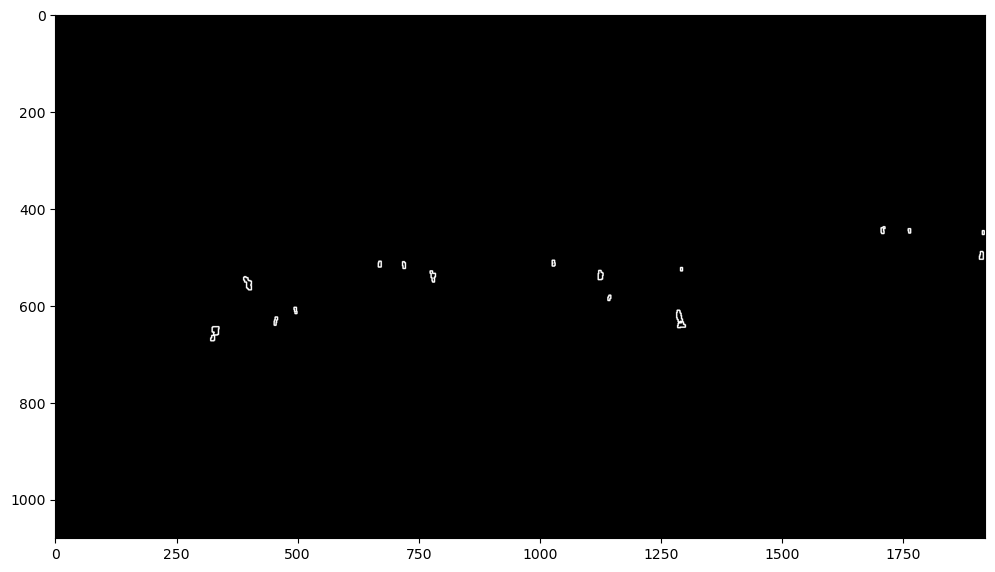

In [444]:
people_cont = []
for i in range(len(contours)):
    if aspect_ratio_calc[i] > 0.4 and aspect_ratio_calc[i] < 0.6:
        people_cont.append(contours[i])
print("Cont en el rango: ",len(people_cont))

canvas = np.zeros_like(dilated_image)

# Draw the contours on the canvas in green color with a thickness of 2
cv2.drawContours(canvas, people_cont, -1, 255, 2)  # -1 to draw all contours


fig = plt.figure(figsize=(12, 10))
plt.imshow(canvas, cmap = "gray")

# DATASET CON COLOR

In [ ]:
image_filenames = os.listdir("data")
for i in range(len(image_filenames)):
    image_filenames[i] = "data/" + image_filenames[i]

image_stack_color = np.stack([cv2.cvtColor(cv2.imread(filename),cv2.COLOR_RGB2BGR) for filename in image_filenames], axis=2)

print(image_stack_color.shape)
image_stack_color = np.transpose(image_stack_color, (2, 0, 1, 3))


fig = plt.figure(figsize=(12, 10))
plt.imshow(image_stack_color[0], cmap = "gray")

# DIVIDE IMAGE IN SECTORS

(640, 1920)


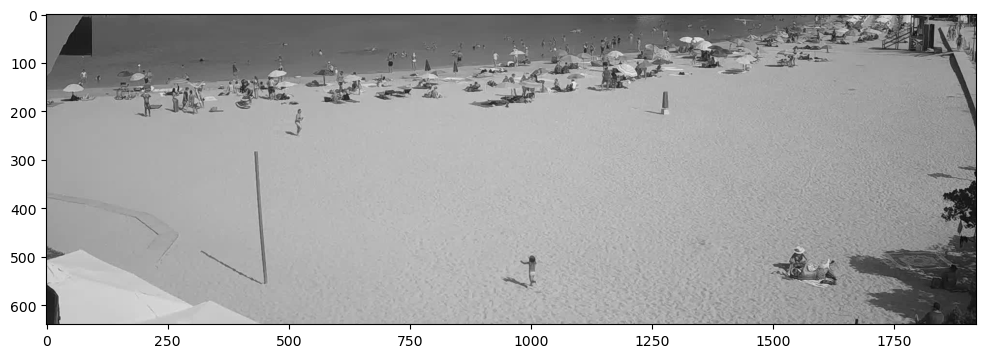

In [445]:
image_mod = image_stack[0][440:,:].copy()

print(image_mod.shape)
fig = plt.figure(figsize=(12, 10))
plt.imshow(image_mod, cmap = "gray")

In [446]:
img_size = image_mod.shape
sqrt_arr = np.sqrt(np.linspace(1,img_size[0],8, dtype = np.int_))
norm_arr = min_max_norm(log_arr)
cut_boundaries = img_size[0] - (norm_arr * img_size[0]).astype(int)
cut_boundaries

array([640, 414, 311, 231, 163, 104,  50,   0])

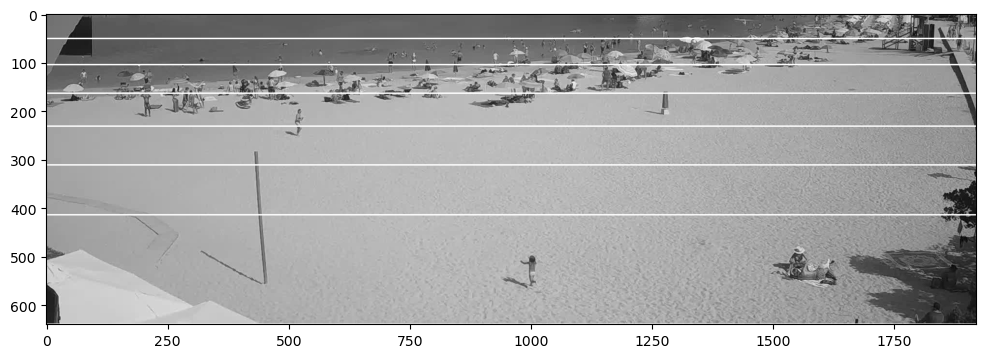

In [447]:
drawn_image = image_mod.copy()

for i in cut_boundaries:
    cv2.line(drawn_image, (0,i), (img_size[1],i), 255, 2)


fig = plt.figure(figsize=(12, 10))
plt.imshow(drawn_image, cmap = "gray")

In [430]:
tmp = np.repeat(cut_boundaries, 2)[1:-1]
cut_boundaries_paris = tmp[:(len(tmp) // 2 + 1) * 2].reshape(-1, 2)
image_list_sectors = []

for pair_i in cut_boundaries_paris:
    img = image_mod[pair_i[1]:pair_i[0],:].copy()
    image_list_sectors.append(img)


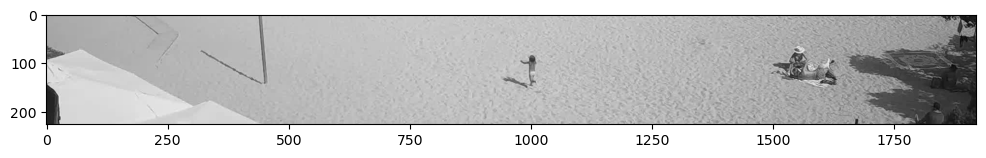

In [439]:

fig = plt.figure(figsize=(12, 10))
plt.imshow(image_list_sectors[], cmap = "gray")

In [429]:
tmp = np.repeat(cut_boundaries, 2)[1:-1]
cut_boundaries_paris = tmp[:(len(tmp) // 2 + 1) * 2].reshape(-1, 2)
for pair_i in cut_boundaries_paris:
    print(pair_i)

[640 414]
[414 311]
[311 231]
[231 163]
[163 104]
[104  50]
[50  0]


### Function

In [448]:
def divide_img_sectors(image):
    # Find boundaries
    
    img_size = image.shape
    sqrt_arr = np.sqrt(np.linspace(1,img_size[0],8, dtype = np.int_))
    norm_arr = min_max_norm(log_arr)
    cut_boundaries = img_size[0] - (norm_arr * img_size[0]).astype(int)

    tmp = np.repeat(cut_boundaries, 2)[1:-1]
    cut_boundaries_paris = tmp[:(len(tmp) // 2 + 1) * 2].reshape(-1, 2)
    image_list_sectors = []

    for pair_i in cut_boundaries_paris:
        img = image[pair_i[1]:pair_i[0],:].copy()
        image_list_sectors.append(img)

    return image_list_sectors

    

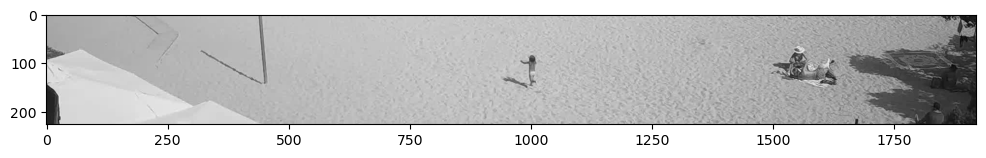

In [451]:
image_mod = image_stack[0][440:,:].copy()
img_sectors = divide_img_sectors(image_mod)

fig = plt.figure(figsize=(12, 10))
plt.imshow(img_sectors[0], cmap = "gray")

In [ ]:
clahe = cv2.createCLAHE(clipLimit=3)

empty_beach_3 = clahe.apply(image_mod_3)

test_image_1 = clahe.apply(image_mod_4)

subs_image = cv2.subtract(empty_beach_9, test_image_1)

